<a href="https://colab.research.google.com/github/CHenriquezG/Minor-Machine-Learning-test/blob/main/Proyecto%20Final%20ML/%20Entrega%2002%20-%20Scrub/%20Entrega_03-Explore%20-%20Claudio%20Henriquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


nombre: Claudio henriquez

In [83]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

###Entrega 01 - OBTAIN

Incluir todo el código de la Etapa 01 - OBTAIN creada en la semana anterior

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
columna = ["user","activity","timestamp","x-acceleration","y-accel","z-accel"]
dataset=pd.read_table('/content/drive/MyDrive/ml/WISDM_ar_v1.1_raw.txt',sep=",",
                      header=None,
                      names=columna)

# se remueve el punto y coma en el "z"
dataset['z-accel'] = dataset['z-accel'].str.replace(";", "")
dataset.head()

,user,activity,timestamp,x-acceleration,y-accel,z-accel
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes

*Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.*


In [86]:
datasetCopy = dataset.copy(deep = True)
datasetCopy[["user","activity","timestamp","x-acceleration","y-accel","z-accel"]] =datasetCopy[["user","activity","timestamp","x-acceleration","y-accel","z-accel"]].replace(0,np.NaN) 
datasetCopy.isnull().sum()

user                  0
activity              0
timestamp         12843
x-acceleration    16511
y-accel           13999
z-accel               1
dtype: int64

In [87]:
datasetCopy = datasetCopy.dropna()
datasetCopy.isnull().sum()


user              0
activity          0
timestamp         0
x-acceleration    0
y-accel           0
z-accel           0
dtype: int64

Agregar al DataFrame los nombres de las columnas 

*En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.*

In [88]:
dataset = datasetCopy
columnasR = ["user","activity","time","x","y","z"]
dataset.columns = columnasR
dataset.head()


,user,activity,time,x,y,z
0,33,Jogging,4.910596e+13,-0.694638,12.680544,0.50395286
1,33,Jogging,4.910606e+13,5.012288,11.264028,0.95342433
2,33,Jogging,4.910611e+13,4.903325,10.882658,-0.08172209
3,33,Jogging,4.910622e+13,-0.612916,18.496431,3.0237172
4,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164


Visualizar las 5 primeras filas del DataFrame (.head())

*Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.*


In [89]:
dataset.head()

,user,activity,time,x,y,z
0,33,Jogging,4.910596e+13,-0.694638,12.680544,0.50395286
1,33,Jogging,4.910606e+13,5.012288,11.264028,0.95342433
2,33,Jogging,4.910611e+13,4.903325,10.882658,-0.08172209
3,33,Jogging,4.910622e+13,-0.612916,18.496431,3.0237172
4,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164


Buscar datos nulos y eliminarlos si es que existen

In [90]:
datasetCopy.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

Visualizar los tipo de datos a los que pertenece cada columna (.info())

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*


In [91]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080536 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1080536 non-null  int64  
 1   activity  1080536 non-null  object 
 2   time      1080536 non-null  float64
 3   x         1080536 non-null  float64
 4   y         1080536 non-null  float64
 5   z         1080536 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 57.7+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación 

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$



In [92]:
lb = LabelEncoder()
dataset["z"] = pd.to_numeric(dataset["z"])

dataset.head()

,user,activity,time,x,y,z
0,33,Jogging,4.910596e+13,-0.694638,12.680544,0.503953
1,33,Jogging,4.910606e+13,5.012288,11.264028,0.953424
2,33,Jogging,4.910611e+13,4.903325,10.882658,-0.081722
3,33,Jogging,4.910622e+13,-0.612916,18.496431,3.023717
4,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164


Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*


In [93]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080536 entries, 0 to 1098203
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1080536 non-null  int64  
 1   activity  1080536 non-null  object 
 2   time      1080536 non-null  float64
 3   x         1080536 non-null  float64
 4   y         1080536 non-null  float64
 5   z         1080536 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 57.7+ MB


Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*


In [94]:
#se elimino time y user
copia = dataset.copy()
dataset = dataset.drop(['time'], axis=1)
dataset = dataset.drop(['user'], axis=1)
dataset.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


Utilizar el comando *value_counts* para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar


In [95]:
dataset.value_counts("activity")

# aca se puede ver que standing es el menor 

activity
Walking       422301
Jogging       329114
Upstairs      121934
Downstairs     99693
Sitting        59462
Standing       48032
dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias. 



In [96]:
x1 = dataset[dataset["activity"] == "Standing"]
x2 = dataset[dataset["activity"] == "Jogging"]
#x1.shape
dat = resample(dataset[dataset["activity"] == "Jogging"],replace=True,n_samples=len(dataset[dataset["activity"] == "Standing"]),random_state=42)
dat2 = resample(dataset[dataset["activity"] == "Upstairs"],replace=True,n_samples=len(dataset[dataset["activity"] == "Standing"]),random_state=42)
dat3 = resample(dataset[dataset["activity"] == "Walking"],replace=True,n_samples=len(dataset[dataset["activity"] == "Standing"]),random_state=42)
dat4 = resample(dataset[dataset["activity"] == "Sitting"],replace=True,n_samples=len(dataset[dataset["activity"] == "Standing"]),random_state=42)
dat5 = resample(dataset[dataset["activity"] == "Downstairs"],replace=True,n_samples=len(dataset[dataset["activity"] == "Standing"]),random_state=42)

#juntamos todo
new = pd.concat([dat,dat2])
new = pd.concat([new,dat3])
new = pd.concat([new,dat4])
new = pd.concat([new,dat5])
new = pd.concat([new,x1])

new.value_counts("activity")

activity
Downstairs    48032
Jogging       48032
Sitting       48032
Standing      48032
Upstairs      48032
Walking       48032
dtype: int64

Establecer el número de instancias y dimensiones del data frame resultante *(shape)*


In [97]:
new.shape

(288192, 4)

Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*

In [98]:
new.value_counts("activity")

activity
Downstairs    48032
Jogging       48032
Sitting       48032
Standing      48032
Upstairs      48032
Walking       48032
dtype: int64

Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*


In [99]:
new.head()

,activity,x,y,z
389011,Jogging,4.60,-1.31,-0.694638
495157,Jogging,-14.25,10.84,-5.520000
421905,Jogging,-8.85,2.87,-9.960000
876811,Jogging,-9.23,-6.55,-9.040000
386926,Jogging,-1.42,8.08,3.827318


Separar las variables predictoras (X) de las ctegorias o etiquetas (y)

In [100]:
x = new['activity']
y = new.drop(['activity'], axis=1)

Estandarizar los datos numericos (*StandardScaler)*

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*


In [101]:
scaler = StandardScaler()
escalado = scaler.fit_transform(y)

yd = pd.DataFrame(escalado)
columnasR = ["x","y","z"]
yd.columns = columnasR
yd.head()

,x,y,z
0,0.687271,-1.399740,-0.440305
1,-2.464977,0.646834,-1.490216
2,-1.561946,-0.695651,-2.456279
3,-1.625493,-2.282377,-2.256104
4,-0.319442,0.181934,0.543591


Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)


In [102]:
xd = pd.DataFrame(x)
xd = xd.reset_index(drop=True)
datafinal = pd.concat([xd, yd], axis=1).reindex(xd.index)
datafinal.head()

,activity,x,y,z
0,Jogging,0.687271,-1.399740,-0.440305
1,Jogging,-2.464977,0.646834,-1.490216
2,Jogging,-1.561946,-0.695651,-2.456279
3,Jogging,-1.625493,-2.282377,-2.256104
4,Jogging,-0.319442,0.181934,0.543591


# Entrega 03 - Explore

In [60]:
copia.head()

,user,activity,time,x,y,z
0,33,Jogging,4.910596e+13,-0.694638,12.680544,0.503953
1,33,Jogging,4.910606e+13,5.012288,11.264028,0.953424
2,33,Jogging,4.910611e+13,4.903325,10.882658,-0.081722
3,33,Jogging,4.910622e+13,-0.612916,18.496431,3.023717
4,33,Jogging,4.910633e+13,-1.184970,12.108489,7.205164


en el siguiente grafico podemos observar que existe pocos datos entorno a Siting, Standing, downstairs por lo que puede provocar ineficacia

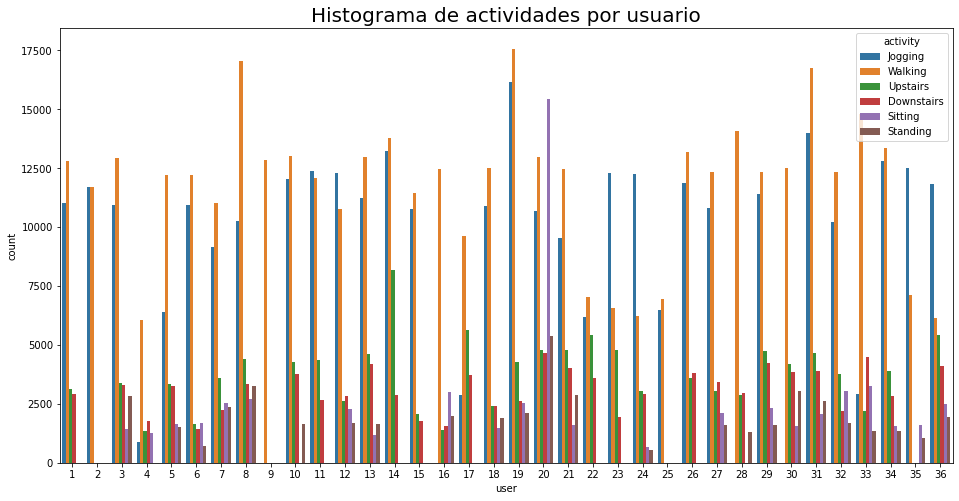

In [61]:
plt.figure(figsize=(16,8))
plt.title('Histograma de actividades por usuario', fontsize=20)
sns.countplot(x='user',hue='activity', data = copia)
plt.show()


este otro histograma se clasifica por actividades identificando mas claro las cantidades,donde el valor minimo es de 48032 que es de Stading y el valor maximo es de un 422301 de walking por lo que es entre 8 o 9 veces que Standing



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


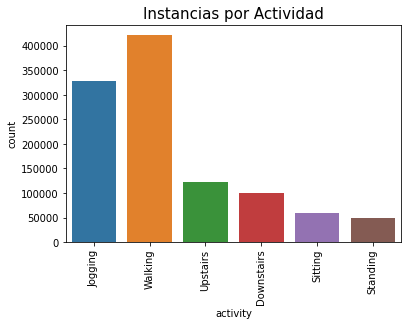

In [62]:
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(copia.activity)
plt.xticks(rotation=90)
plt.show()

In [63]:
copia.activity.value_counts()

Walking       422301
Jogging       329114
Upstairs      121934
Downstairs     99693
Sitting        59462
Standing       48032
Name: activity, dtype: int64

en los siguientes 3 histogramas de frecuencia se graficaron las columnas de las aceleraciones en x,y,z y lo que nos dio fue que
para x los valores que se destacan es entre el -5 y 5
para y los valores de la grafica se destacael intervalo 5 y 10
para z los valores de la grafica se destaca el nitervalo -5 -y 5

(array([ 26198.,  22143.,  46406., 131422., 298123., 266047., 155001.,
         73502.,  33584.,  28110.]),
 array([-19.61 , -15.654, -11.698,  -7.742,  -3.786,   0.17 ,   4.126,
          8.082,  12.038,  15.994,  19.95 ]),
 <a list of 10 Patch objects>)

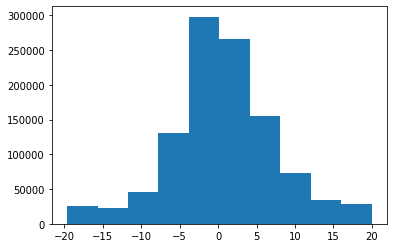

In [64]:
plt.hist(copia.x)

(array([  6766.,   6380.,  13453.,  31630.,  88455., 168053., 234196.,
        282685., 144875., 104043.]),
 array([-19.61 , -15.645, -11.68 ,  -7.715,  -3.75 ,   0.215,   4.18 ,
          8.145,  12.11 ,  16.075,  20.04 ]),
 <a list of 10 Patch objects>)

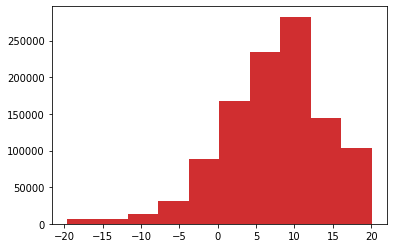

In [66]:
plt.hist(copia.y)

(array([  1983.,   9342.,  27192., 101718., 390815., 338328., 117401.,
         75206.,  14690.,   3861.]),
 array([-19.8  , -15.859, -11.918,  -7.977,  -4.036,  -0.095,   3.846,
          7.787,  11.728,  15.669,  19.61 ]),
 <a list of 10 Patch objects>)

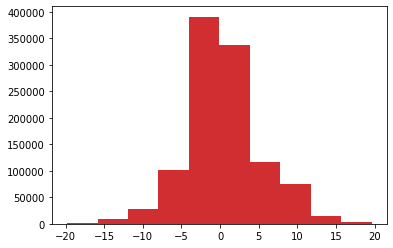

In [67]:
plt.hist(copia.z)

otro histograma nos muestra la distribucion de datos lineal, y los datos que se pueden destacar es la de standing en la que se concentra entorno al intervalo 6 y 10, y no tiene presencia en en intervalo 10 y 20 , y -10  y 0 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplo

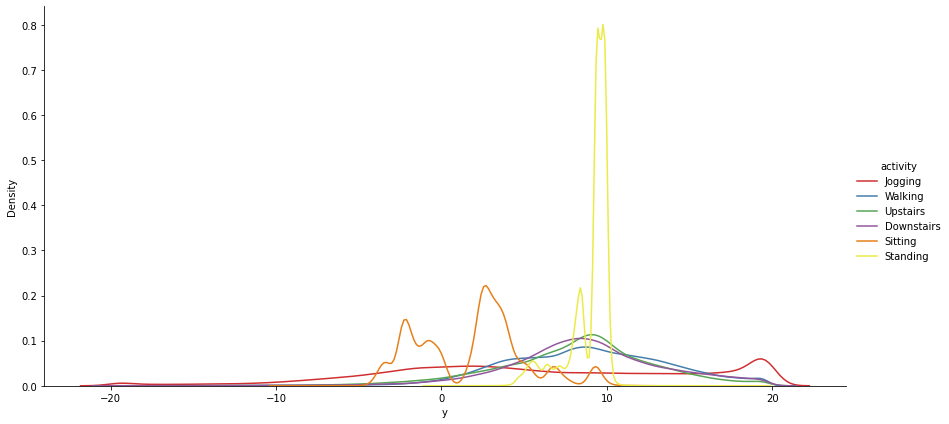

In [104]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(copia, hue='activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'y', hist=False)\
    .add_legend()
plt.show()

diagrama de caja entorno al acelerometro y por lo que podemos concluir que:
si el acelerometro de x,y,z de standing, como se ha visto en otros histogramas, posee un intervalo reducido por lo que puede provocar problemas de eficacia 


In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.distplot(copia['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(copia['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(copia['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

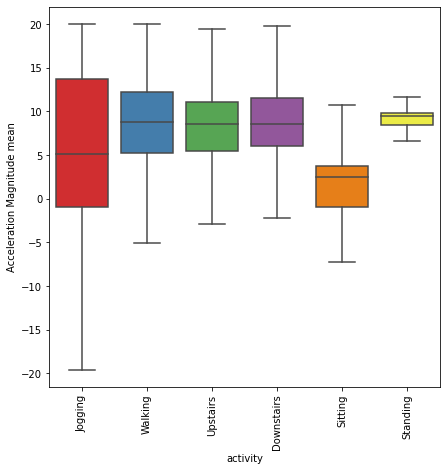

In [107]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='y',data=copia, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

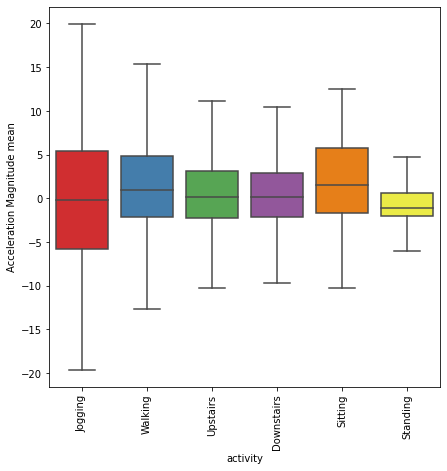

In [108]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='x',data=copia, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()

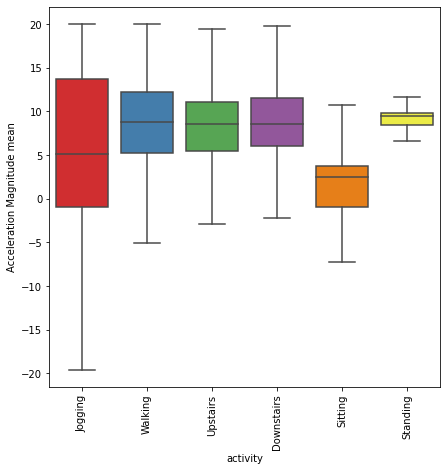

In [109]:
plt.figure(figsize=(7,7))
sns.boxplot(x='activity', y='y',data=copia, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.xticks(rotation=90)
plt.show()